## Project | Deep Learning: Image Classification with CNN

# Data Preprocessing

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import VGG16


In [ ]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
# classes names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Normalize the data
train_images, test_images = train_images / 255.0, test_images / 255.0

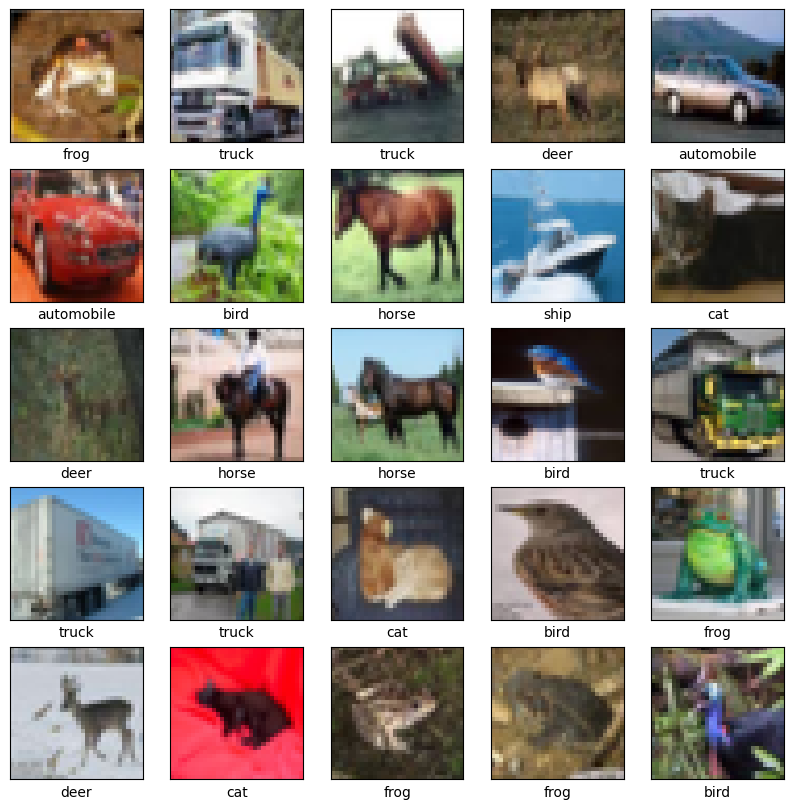

In [ ]:
#visualizations
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
#Convert the labels to one-hot encoded form.
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [ ]:
print("train_labels shape:", train_labels.shape)
print("test_labels shape:", test_labels.shape)

train_labels shape: (50000, 10)
test_labels shape: (10000, 10)


In [ ]:
train_images.shape

(50000, 32, 32, 3)

# Model 1

## Model Architecture

In [ ]:
model= keras.Sequential([

    layers.Input(shape=(32,32,3)),
    #Layer 1: Convolutional
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    #Layer 2: Convolutional
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    # MaxPooling Layer
    layers.MaxPooling2D((2, 2)),
    # Dropout Layer
    layers.Dropout(0.3),

    #Layer 3: Convolutional
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    #Layer 4: Convolutional
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    # MaxPooling Layer
    layers.MaxPooling2D((2, 2)),
    # Dropout Layer
    layers.Dropout(0.4),

    #Layer 5: Convolutional
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    #Layer 6: Convolutional
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    # MaxPooling Layer
    layers.MaxPooling2D((2, 2)),
    # Dropout Layer
    layers.Dropout(0.4),

    # Flatten Layer
    layers.Flatten(),
    # Fully Connected Layer
    layers.Dense(512, activation='relu'),
    # Softmax Layer
    layers.Dense(10, activation='softmax')
])

# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [ ]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define Callbacks for Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
batch_size = 100
epochs = 50
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[early_stopping])

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.2592 - loss: 1.9683 - val_accuracy: 0.4813 - val_loss: 1.4226
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4914 - loss: 1.3962 - val_accuracy: 0.5590 - val_loss: 1.2033
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5696 - loss: 1.2000 - val_accuracy: 0.6406 - val_loss: 1.0155
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6213 - loss: 1.0617 - val_accuracy: 0.6499 - val_loss: 0.9869
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6537 - loss: 0.9692 - val_accuracy: 0.6939 - val_loss: 0.8636
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6790 - loss: 0.9021 - val_accuracy: 0.7205 - val_loss: 0.7959
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7082 - loss: 0.8318 - val_accuracy: 0.7246 - val_loss: 0.7799
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7241 - loss: 0.7834 - val_accuracy: 0

In [ ]:
model.save("cnn_model1.h5")

In [ ]:
# Get final training and validation accuracy
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

# Get final training and validation loss
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

# Print results
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

Final Training Accuracy: 0.8818
Final Validation Accuracy: 0.8147
Final Training Loss: 0.3306
Final Validation Loss: 0.5708


## Model Evaluation

* Evaluate the trained model on a separate validation set.
* Compute and report metrics such as accuracy, precision, recall, and F1-score.
* Visualize the confusion matrix to understand model performance across different classes.


In [ ]:
#load model
model = keras.models.load_model("cnn_model1.h5")

In [ ]:
#Evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8228 - loss: 0.5404
Test Accuracy: 0.8164


In [ ]:
# Predict class probabilities
y_pred_prob = model.predict(test_images)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(test_labels, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [ ]:
#Compute and report metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.8164
Precision: 0.8170
Recall: 0.8164
F1-score: 0.8155


In [ ]:
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.89      0.93      0.91      1000
           2       0.81      0.70      0.75      1000
           3       0.68      0.61      0.65      1000
           4       0.81      0.78      0.79      1000
           5       0.68      0.79      0.73      1000
           6       0.82      0.88      0.85      1000
           7       0.84      0.87      0.85      1000
           8       0.90      0.88      0.89      1000
           9       0.92      0.87      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



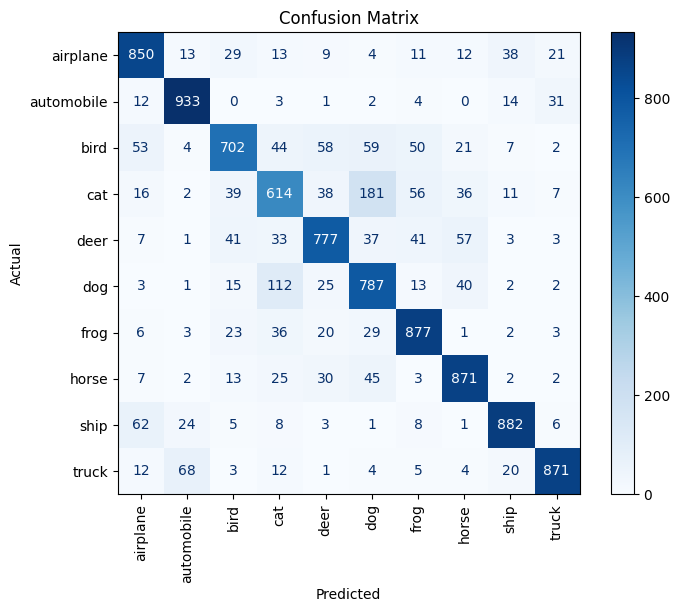

In [ ]:
#Visualize the confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(xticks_rotation='vertical', ax=ax,cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

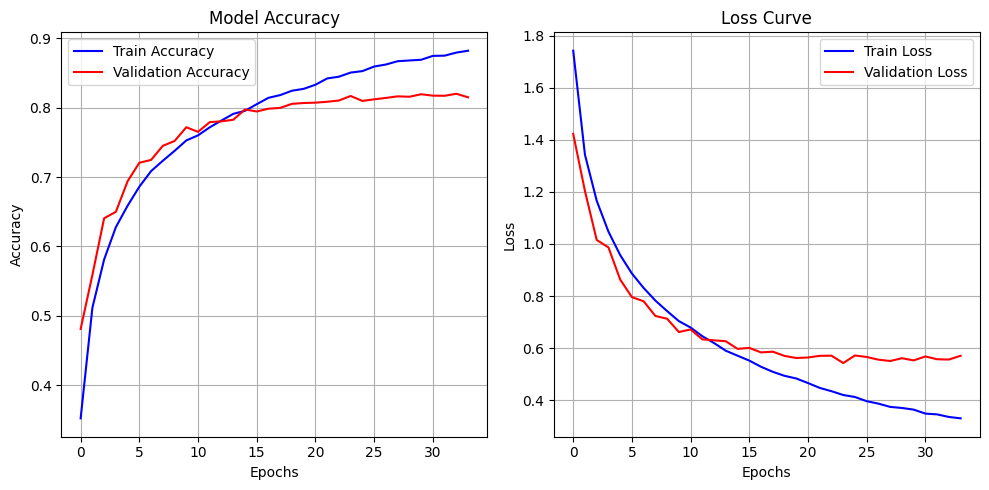

In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

axs[0].plot(history.history['accuracy'], label='Train Accuracy',color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy',color='red')
axs[0].legend()
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].grid(True);


# Plot training & validation loss
axs[1].plot(history.history['loss'], label='Train Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].set_title('Loss Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True);

plt.tight_layout()
plt.show()


# Model 2:


## Model Architecture

In [ ]:
second_model= keras.Sequential([

    layers.Input(shape=(32,32,3)),
    #Layer 1: Convolutional
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),


    layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same',kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    # Flatten Layer
    layers.Flatten(),
    # Fully Connected Layer
    layers.Dense(1024, activation='relu',kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    # Softmax Layer
    layers.Dense(10, activation='softmax')
])

# Display the model architecture
second_model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_53 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,248,746 (8.58 MB)

 Trainable params: 2,248,298 (8.58 MB)

 Non-trainable params: 448 (1.75 KB)

## Model Training

In [ ]:
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

second_model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define Callbacks for Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
batch_size = 64
epochs = 50
history2 = second_model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[early_stopping])

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.3375 - loss: 3.5969 - val_accuracy: 0.4473 - val_loss: 2.4098
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5549 - loss: 2.0461 - val_accuracy: 0.6197 - val_loss: 1.7792
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6413 - loss: 1.6978 - val_accuracy: 0.6875 - val_loss: 1.5872
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6803 - loss: 1.5924 - val_accuracy: 0.7155 - val_loss: 1.4875
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7041 - loss: 1.5193 - val_accuracy: 0.6052 - val_loss: 1.9874
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7222 - loss: 1.4745 - val_accuracy: 0.7252 - val_loss: 1.4486
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7312 - loss: 1.4221 - val_accuracy: 0.6962 - val_loss: 1.5575
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7410 - loss: 1.3942 - val_accuracy: 

In [ ]:
second_model.save("second_model.h5")

In [ ]:
final_train_acc = history2.history['accuracy'][-1]
final_val_acc = history2.history['val_accuracy'][-1]

# Get final training and validation loss
final_train_loss = history2.history['loss'][-1]
final_val_loss = history2.history['val_loss'][-1]

# Print results
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

Final Training Accuracy: 0.8022
Final Validation Accuracy: 0.7909
Final Training Loss: 1.0924
Final Validation Loss: 1.1279


## Evaluate

In [ ]:
#Evaluate
test_loss, test_acc = second_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8080 - loss: 1.0728
Test Accuracy: 0.8117


In [ ]:
# Predict class probabilities
y_pred_prob2 = second_model.predict(test_images)

# Convert probabilities to class labels
y_pred2 = np.argmax(y_pred_prob2, axis=1)
y_true2 = np.argmax(test_labels, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


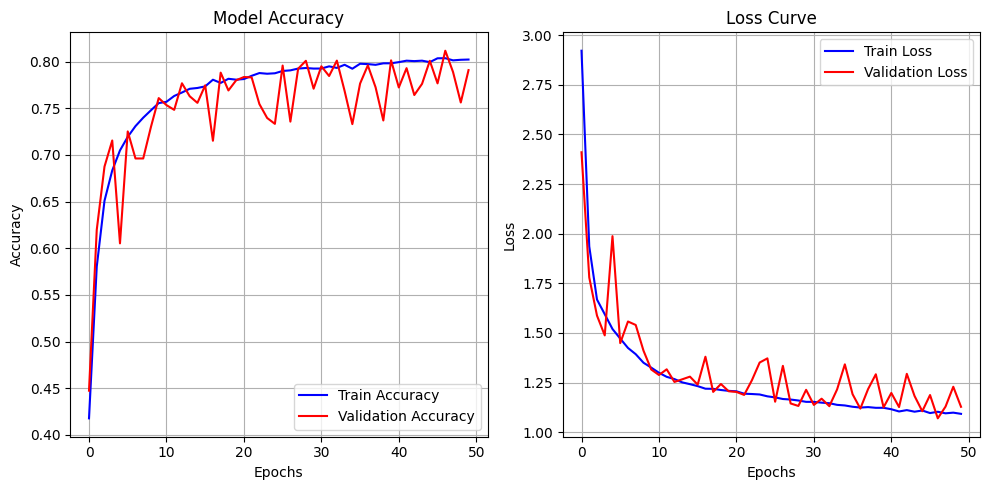

In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Plot Accuracy  & validation accuracy
axs[0].plot(history2.history['accuracy'], label='Train Accuracy',color='blue')
axs[0].plot(history2.history['val_accuracy'], label='Validation Accuracy',color='red')
axs[0].legend()
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].grid(True);


# Plot training & validation loss
axs[1].plot(history2.history['loss'], label='Train Loss', color='blue')
axs[1].plot(history2.history['val_loss'], label='Validation Loss', color='red')
axs[1].set_title('Loss Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True);

plt.tight_layout()
plt.show()


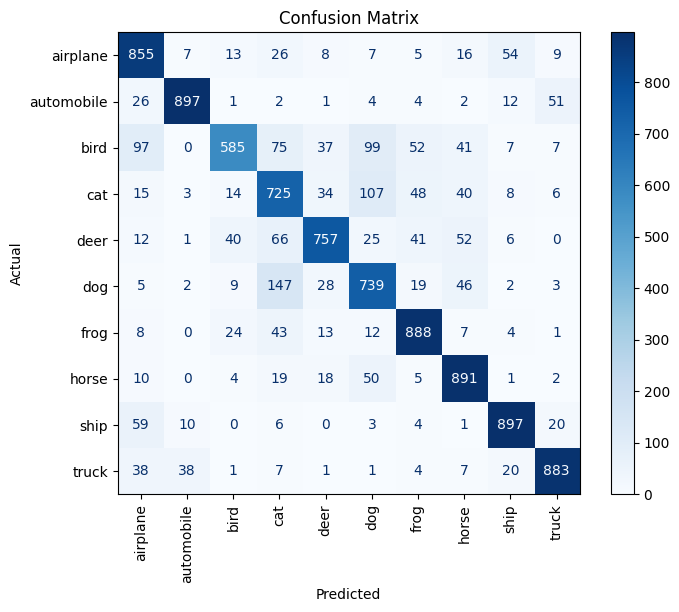

In [ ]:
#Visualize the confusion matrix
cm = confusion_matrix(y_true2, y_pred2)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(xticks_rotation='vertical', ax=ax,cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_true2, y_pred2))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1000
           1       0.94      0.90      0.92      1000
           2       0.85      0.58      0.69      1000
           3       0.65      0.72      0.69      1000
           4       0.84      0.76      0.80      1000
           5       0.71      0.74      0.72      1000
           6       0.83      0.89      0.86      1000
           7       0.81      0.89      0.85      1000
           8       0.89      0.90      0.89      1000
           9       0.90      0.88      0.89      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



In [ ]:
#Compute and report metrics
accuracy2 = accuracy_score(y_true2, y_pred2)
precision2 = precision_score(y_true2, y_pred2, average='weighted')
recall2 = recall_score(y_true2, y_pred2, average='weighted')
f1_second = f1_score(y_true2, y_pred2, average='weighted')

print(f'Accuracy: {accuracy2:.4f}')
print(f'Precision: {precision2:.4f}')
print(f'Recall: {recall2:.4f}')
print(f'F1-score: {f1_second:.4f}')

Accuracy: 0.8117
Precision: 0.8166
Recall: 0.8117
F1-score: 0.8107


In [ ]:
y_pred2[:10]

array([3, 8, 8, 8, 6, 6, 1, 6, 3, 1])

In [ ]:
y_true2[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

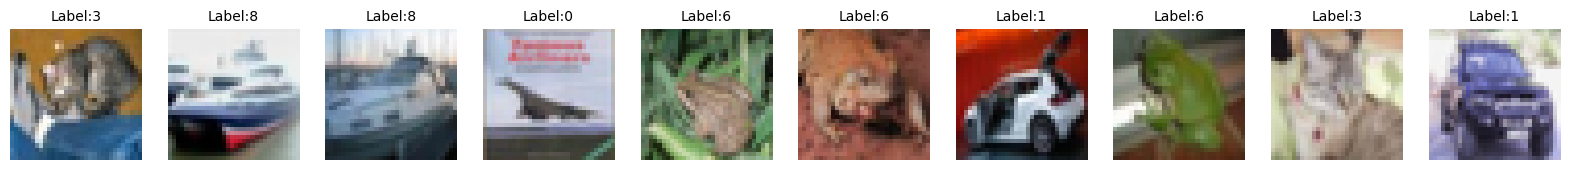

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(20, 4))
for i in range(10):
    axes[i].imshow(test_images[i])
    axes[i].set_title(f"Label:{y_true2[i]}", fontsize=10)
    axes[i].axis('off')

plt.show()

# Transfer Learning


In [ ]:
# Load VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional base to retain pre-trained features
base_model.trainable = False

# Flatten the output of the convolutional base
x = Flatten()(base_model.output)

# fully connected layers
x = Dense(1024, activation='relu',kernel_regularizer=l2(0.001) )(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

# final model
model_vgg = Model(inputs=base_model.input, outputs=x)

# Compile the model
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Show model summary
model_vgg.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,250,250 (58.18 MB)

 Trainable params: 535,562 (2.04 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# train the model
history_vgg = model_vgg.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=50,
                    batch_size=64,
                    shuffle=True,
                    verbose=1)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5765 - loss: 1.3329 - val_accuracy: 0.5980 - val_loss: 1.2840
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5851 - loss: 1.3241 - val_accuracy: 0.5923 - val_loss: 1.3026
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5798 - loss: 1.3292 - val_accuracy: 0.5954 - val_loss: 1.2845
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5819 - loss: 1.3213 - val_accuracy: 0.5885 - val_loss: 1.3057
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5796 - loss: 1.3324 - val_accuracy: 0.5972 - val_loss: 1.2876
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5841 - loss: 1.3299 - val_accuracy: 0.6018 - val_loss: 1.2736
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5824 - loss: 1.3270 - val_accuracy: 0.5985 - val_loss: 1.2840
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5776 - loss: 1.3338 - val_accuracy: 0.

In [ ]:
# Evaluate your trained model
test_loss, test_acc = second_model.evaluate(test_images, test_labels, verbose=0)
print(f"Second Model - Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Evaluate the pre-trained model
pretrained_loss, pretrained_acc = model_vgg.evaluate(test_images, test_labels, verbose=0)
print(f"Pre-trained Model - Test Accuracy: {pretrained_acc:.4f}, Test Loss: {pretrained_loss:.4f}")


Second Model - Test Accuracy: 0.8117, Test Loss: 1.0698
Pre-trained Model - Test Accuracy: 0.5971, Test Loss: 1.2878


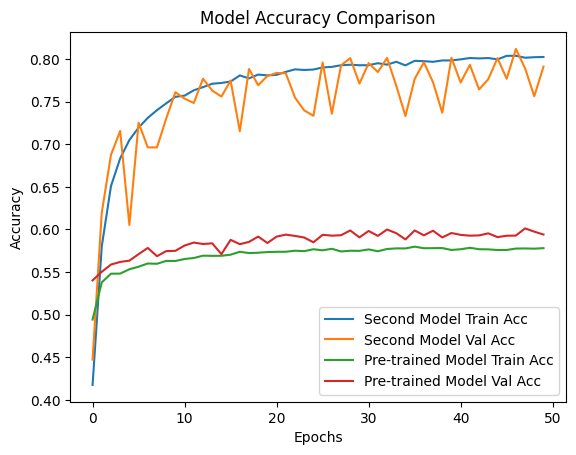

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy comparison
plt.plot(history2.history['accuracy'], label='Second Model Train Acc')
plt.plot(history2.history['val_accuracy'], label='Second Model Val Acc')

plt.plot(history_vgg.history['accuracy'], label='Pre-trained Model Train Acc')
plt.plot(history_vgg.history['val_accuracy'], label='Pre-trained Model Val Acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Comparison')
plt.show()


In [ ]:
# Define VGG16 architecture: from scratch
def VGG16_model(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([

        layers.Input(shape=input_shape),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


vgg_model = VGG16_model()

# Display the model summary
vgg_model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_58 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_66 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_68 (Conv2D)                   │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_70 (Conv2D)                   │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 4096)                │       2,101,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 33,638,218 (128.32 MB)

 Trainable params: 33,638,218 (128.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_tr = vgg_model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=20,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.0993 - loss: 2.3088 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.0942 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1003 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1003 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1014 - loss: 2.3025 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1006 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.0992 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.0992 - loss: 